# Guia do funcionamento da Simulação do Blind Quantum Computing
##### O documento tem o objetivo de demostrar o funcionamento da simulação dos protocolos Childs e BFK no BQC.
#### IMPORTANDO AS DEPENDÊNCIAS


In [1]:
import random
from quantumnet.components import Network, Host
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

##### É inicializada a rede, com uma topologia de grade, que apresenta 1 servidor (nó verde) e 8 clientes (nós vermelhos).

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


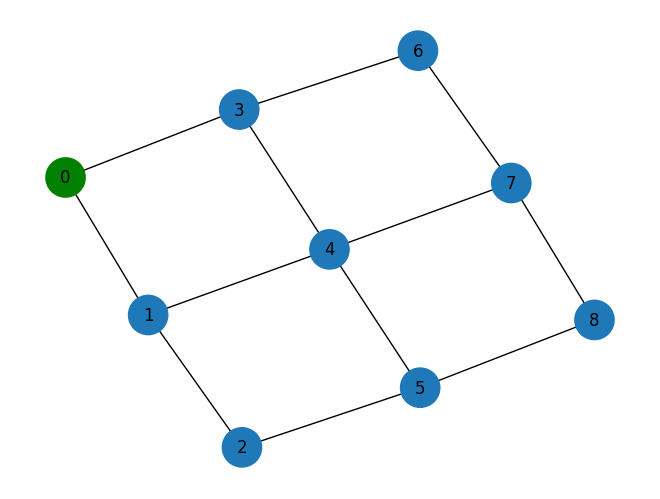

In [2]:
rede = Network()
rede.set_ready_topology('grade',8,3,3)  # Exemplo de uma grade 3x3 com  clientes e 1 servidor
rede.draw()
Logger.activate(Logger)

##### A realização da simulação de uma requesição acontece de forma em que vamos passar uma função para a geração de um circuito aleatório com o número de qubits e número de portas passados como parâmetros e a escolha de um protocolo para executar esse circuito. O protocolo escolhido foi o AC_BQC, Childs, e o cliente é (alice_id).

In [3]:
circuit, num_qubits = rede.generate_random_circuit(num_qubits=5, num_gates=30) 
rede.application_layer.run_app("AC_BQC", alice_id=6, bob_id=0, num_qubits=num_qubits,scenario=1)

     ┌───┐              ┌───┐┌───┐                                           »
q_0: ┤ X ├────────────■─┤ S ├┤ H ├──────────────────────X──────────X───■───■─»
     └─┬─┘┌───┐       │ └───┘└───┘        ┌───┐   ┌───┐ │          │   │   │ »
q_1: ──┼──┤ Y ├─■──■──┼───■────■────────X─┤ X ├─■─┤ Z ├─┼──────────┼───■───┼─»
       │  └───┘ │  │  │   │    │  ┌───┐ │ ├───┤ │ └───┘ │          │       │ »
q_2: ──┼────■───┼──┼──■───■────┼──┤ Z ├─┼─┤ Y ├─┼───────┼───X───■──┼───────■─»
       │    │   │  │           │  ├───┤ │ └───┘ │       │   │   │  │         »
q_3: ──■────■───┼──■───────────■──┤ Z ├─┼───────┼───■───┼───X───■──┼─────────»
                │                 └───┘ │       │   │   │ ┌───┐    │ ┌───┐   »
q_4: ───────────■───────────────────────X───────■───■───X─┤ T ├────X─┤ X ├───»
                                                          └───┘      └───┘   »
«             ┌───┐
«q_0: ──────X─┤ H ├
«           │ ├───┤
«q_1: ──────┼─┤ X ├
«     ┌───┐ │ └─┬─┘
«q_2: ┤ H ├─┼───┼──
«     └───┘

2024-12-16 23:43:15,782: Circuito aleatório gerado com 5 qubits e 30 portas. Instruções sobre o circuito.
2024-12-16 23:43:15,784: Instrução: {'operation': 'cx', 'qubits': [3, 0]}
2024-12-16 23:43:15,784: Instrução: {'operation': 'cz', 'qubits': [3, 2]}
2024-12-16 23:43:15,785: Instrução: {'operation': 'y', 'qubits': [1]}
2024-12-16 23:43:15,785: Instrução: {'operation': 'cz', 'qubits': [1, 4]}
2024-12-16 23:43:15,786: Instrução: {'operation': 'cz', 'qubits': [3, 1]}
2024-12-16 23:43:15,786: Instrução: {'operation': 'cz', 'qubits': [2, 0]}
2024-12-16 23:43:15,786: Instrução: {'operation': 'cz', 'qubits': [2, 1]}
2024-12-16 23:43:15,787: Instrução: {'operation': 's', 'qubits': [0]}
2024-12-16 23:43:15,788: Instrução: {'operation': 'cz', 'qubits': [3, 1]}
2024-12-16 23:43:15,788: Instrução: {'operation': 'z', 'qubits': [3]}
2024-12-16 23:43:15,788: Instrução: {'operation': 'z', 'qubits': [2]}
2024-12-16 23:43:15,789: Instrução: {'operation': 'swap', 'qubits': [4, 1]}
2024-12-16 23:43:15,

2024-12-16 23:43:15,829: Par EPR <quantumnet.objects.epr.Epr object at 0x00000296B7363ED0> adicionado ao canal (3, 0).
2024-12-16 23:43:15,829: Par EPR <quantumnet.objects.epr.Epr object at 0x00000296B5EC3C50> adicionado ao canal (3, 0).
2024-12-16 23:43:15,830: 10 pares EPRs criados para cada segmento da rota [6, 3, 0].
2024-12-16 23:43:15,830: Fidelidade do EPR 6->3: 1.0
2024-12-16 23:43:15,832: Fidelidade do EPR 3->0: 1.0
2024-12-16 23:43:15,835: Produto das fidelidades para rota [6, 3, 0]: 1.0
2024-12-16 23:43:15,836: Fidelidade atual da rota: 1.0
2024-12-16 23:43:15,836: Pares EPRs restantes no segmento 6 -> 3: 11
2024-12-16 23:43:15,837: Pares EPRs restantes no segmento 3 -> 0: 11
2024-12-16 23:43:15,838: Fidelidade final: 0.9334 (F_qubit: 0.9334 * F_rota: 1.0000)
2024-12-16 23:43:15,838: Fidelidade do EPR 6->3: 0.999
2024-12-16 23:43:15,839: Fidelidade do EPR 3->0: 0.999
2024-12-16 23:43:15,841: Produto das fidelidades para rota [6, 3, 0]: 0.998001
2024-12-16 23:43:15,842: Fidel

In [4]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9260


0.9260168584278446

In [5]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
0.9334
0.9215
0.9232
0.9670
0.9267
0.9167
0.9050
0.9067
0.9498
0.9101


##### Nesse caso, foi executado o protocolo BFK, com parâmetros como 5 qubits para 5 rounds e 30 portas. Além da escolha de um nó como cliente= alice_id.

In [6]:
# circuito, num_qubits = rede.generate_random_circuit(num_qubits=5, num_gates=30)
# resultado_bfk = rede.application_layer.run_app("BFK_BQC", alice_id=2, bob_id=0, num_qubits=num_qubits, num_rounds=5)

##### Nessa função, podemos coletar a métrica da média da fidelidade dos pares EPRs utilizados nas duas requesições.

In [7]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9260


0.9260168584278446

##### Além de printar as fidelidades das rotas.

In [8]:
# rede.application_layer.print_route_fidelities()

##### Pode ser coletado os EPRs utilizados na camada de aplicação, consequentemente nas requesições e protocolos.

In [9]:
rede.get_total_useds_eprs()

2024-12-16 23:43:16,044: Eprs criados na camada PhysicalLayer: 0
2024-12-16 23:43:16,046: Eprs usados na camada LinkLayer: 0
2024-12-16 23:43:16,047: Eprs usados na camada NetworkLayer: 0
2024-12-16 23:43:16,047: Eprs usados na camada ApplicationLayer: 20


20

In [10]:
#taxadesucesso